# Assignment - 2
### Jarpula Bhanu Prasad - AI21BTECH11015

#### Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Loading IITH logo

(225, 225, 3)


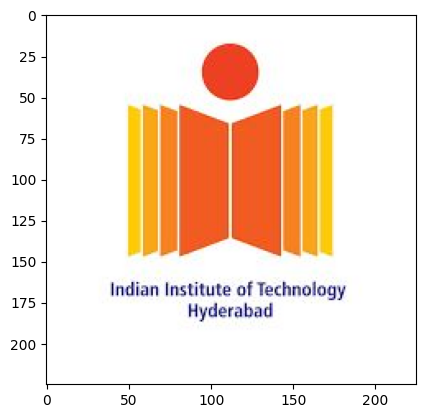

In [3]:
# Reading image
image = plt.imread('logo.jpeg')

# Printing the shape of the image
print(image.shape)

# Displaying image
plt.imshow(image)

#### 1) Convolution function

In [4]:
# defining activation functions.

# sigmoid function
my_sigmoid = lambda x : 1/(1+np.exp(-x))

# tanh function
my_tanh = lambda x : (np.exp(x)-np.exp(x))/(np.exp(x)+np.exp(x))

# relu function
my_relu = lambda x : np.max(0,x)

# parametric relu function 
my_pRelu = lambda x : np.max(0.05*x,x)

In [5]:
# defining kernels

def kernel( name = 'box_blur', k = 3 ):

    match(name):

        case "box_blur":
            return np.ones((k,k,3))/(3*k**2)
        
        case "gaussian_blur":
            arr = np.zeros((k,k))
            variance = ((k-1)/5.5)**2
            for i in range(k):
                for j in range(k):
                    arr[i][j] = np.exp(-((i-k//2)**2+(j-k//2)**2)/(2*variance))
            arr/= np.sum(arr)*3
            return np.dstack((arr,arr,arr))
    
        case  "progressive":
            arr = np.arange(k**2)+1
            arr = arr.reshape((k,k))/(((k+1)*(k+2))**2/(4/3))
            return np.dstack((arr,arr,arr))
        
        case "asymmetric_example":
            arr = np.zeros((k,k))
            arr[0,0] = 1
            arr[-1,-1] = -1
            return np.dstack((arr,arr,arr))  

# defining padding of image

def my_padding(img,width,height,padding,c):

    # flipped images
    horizontal_flipped = img[::-1]
    vertical_flipped = img[:,::-1]
    fully_flipped = img[::-1,::-1]

    padded_array = np.zeros((width+2*padding, height+2*padding,c))
    padded_array[padding:-padding,padding:-padding] = img.copy()
    padded_array[:padding,:padding] = fully_flipped[-padding:,-padding:]
    padded_array[-padding:,-padding:] = fully_flipped[:padding,:padding]
    padded_array[:padding,-padding:] = fully_flipped[-padding:,:padding]
    padded_array[-padding:,:padding] = fully_flipped[:padding,-padding:]
    padded_array[:padding,padding:-padding] = horizontal_flipped[-padding:,:]
    padded_array[-padding:,padding:-padding] = horizontal_flipped[:padding,:]
    padded_array[padding:-padding,:padding] = vertical_flipped[:,-padding:]
    padded_array[padding:-padding,-padding:] = vertical_flipped[:,:padding]

    return padded_array

In [6]:
def convolution(img , kernel , stride = 1, activation = 'sigmoid', padding = 0) :
    
    # kernel and image sizes
    kernel_size = kernel.shape
    img_size = img.shape

    # dimensions of image
    width, height = img_size[:2]
    c = 1
    # dimension of kernel
    k = kernel_size[0]

    if kernel_size.__len__() == 3:
        c = img_size[-1]

    # creating padded image
    if padding:
        padded_array = my_padding(img,width,height,padding,c)
    else:
        padded_array = img.copy()
        
    output_activation = np.zeros(( 1+(width+2*padding-k)//stride, 1+(height+2*padding-k)//stride ))
    x,y = 0,0
    for i in range(0, width+1+2*padding-k, stride):
        for j in range(0, height+1+2*padding-k, stride):
            if activation == 'sigmoid':
                output_activation[x,y] = my_sigmoid(np.sum(padded_array[i:i+k,j:j+k,:]*kernel))
            elif activation == 'tanh':
                output_activation[x,y] = my_tanh(np.sum(padded_array[i:i+k,j:j+k,:]*kernel))
            elif activation == 'relu':
                output_activation[x,y] = my_relu(np.sum(padded_array[i:i+k,j:j+k,:]*kernel))
            elif activation == 'prelu':
                output_activation[x,y] = my_pRelu(np.sum(padded_array[i:i+k,j:j+k,:]*kernel))
         
            y += 1
            
        x += 1
        y = 0
        
    return output_activation

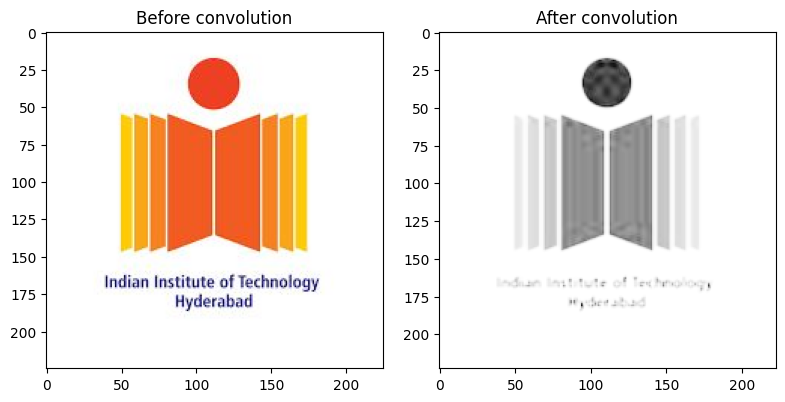

In [7]:
conv_image = convolution(image, kernel('box_blur')/20)
fig, ax = plt.subplots(1,2, figsize = (8,12))
fig.tight_layout(pad=1.0)
ax[0].imshow(image, cmap = 'gray')
ax[0].set_title("Before convolution")
ax[1].imshow(conv_image, cmap = 'gray')
ax[1].set_title("After convolution")
plt.show()

In [8]:
# Displaying of the filter kernel

print(f"The filter kernel : \n {kernel('box_blur')/20}")

The filter kernel : 
 [[[0.00185185 0.00185185 0.00185185]
  [0.00185185 0.00185185 0.00185185]
  [0.00185185 0.00185185 0.00185185]]

 [[0.00185185 0.00185185 0.00185185]
  [0.00185185 0.00185185 0.00185185]
  [0.00185185 0.00185185 0.00185185]]

 [[0.00185185 0.00185185 0.00185185]
  [0.00185185 0.00185185 0.00185185]
  [0.00185185 0.00185185 0.00185185]]]


In [9]:
# Displaying of the output activation map

print(f'The output activation map : \n {conv_image}')

The output activation map : 
 [[0.9999971 0.9999971 0.9999971 ... 0.9999971 0.9999971 0.9999971]
 [0.9999971 0.9999971 0.9999971 ... 0.9999971 0.9999971 0.9999971]
 [0.9999971 0.9999971 0.9999971 ... 0.9999971 0.9999971 0.9999971]
 ...
 [0.9999971 0.9999971 0.9999971 ... 0.9999971 0.9999971 0.9999971]
 [0.9999971 0.9999971 0.9999971 ... 0.9999971 0.9999971 0.9999971]
 [0.9999971 0.9999971 0.9999971 ... 0.9999971 0.9999971 0.9999971]]


#### 2) Pooling function

In [10]:
def pooling(img , pooling_func , stride ):
    width, height = img.shape[:2]
    output_activation = np.zeros(((width-2)//stride+1, (height-2)//stride +1))
    x,y = 0,0
    for i in range(0,width,stride):
        for j in range(0,height,stride):
            match(pooling_func):
                case 'max_pool':
                    # max pooling
                    output_activation[x,y] = np.max(img[i:i+2,j:j+2])
                case 'avg_pool':
                    #average pooling
                    output_activation[x,y] = np.mean(img[i:i+2,j:j+2])
            y+=1
        x+=1
        y=0
    
    fig, ax = plt.subplots(1,2, figsize = (8,12))
    fig.tight_layout(pad=1.0)
    ax[0].imshow(img, cmap = 'gray')
    ax[0].set_title("Before pooling")
    ax[1].imshow(output_activation, cmap = 'gray')
    ax[1].set_title("After pooling")
    
    return output_activation, ax

Shape before pooling (223, 223) shape after pooling (56, 56)


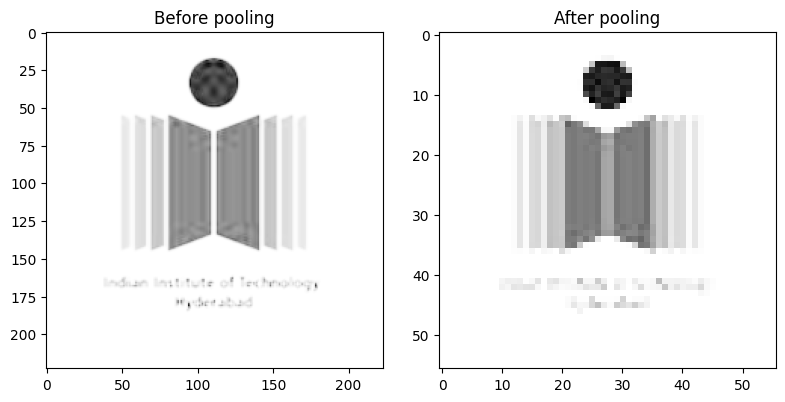

In [11]:
pooled_output, ax = pooling(conv_image, 'avg_pool',4)
print(f"Shape before pooling {conv_image.shape} shape after pooling {pooled_output.shape}")
plt.show()

#### 3) Convolution layer function

In [12]:
def conv_layer_func( img, kernels ,stride = 1, activation = 'sigmoid', padding = 0):

    output = []
    for kernel in kernels:
        conv = convolution(img, kernel, stride, activation, padding)
        output.append(conv)
    output = np.dstack(list(conv for conv in output))
    return output

kernels = (kernel('box_blur'), kernel('asymmetric_example'), kernel('gaussian_blur'), kernel('progressive'))

output = conv_layer_func(image, [kern/40 for kern in kernels])

Verifying that the output of this function does indeed have the expected size (W × H × C) 
 volume:(223, 223, 4) for 4 kernels


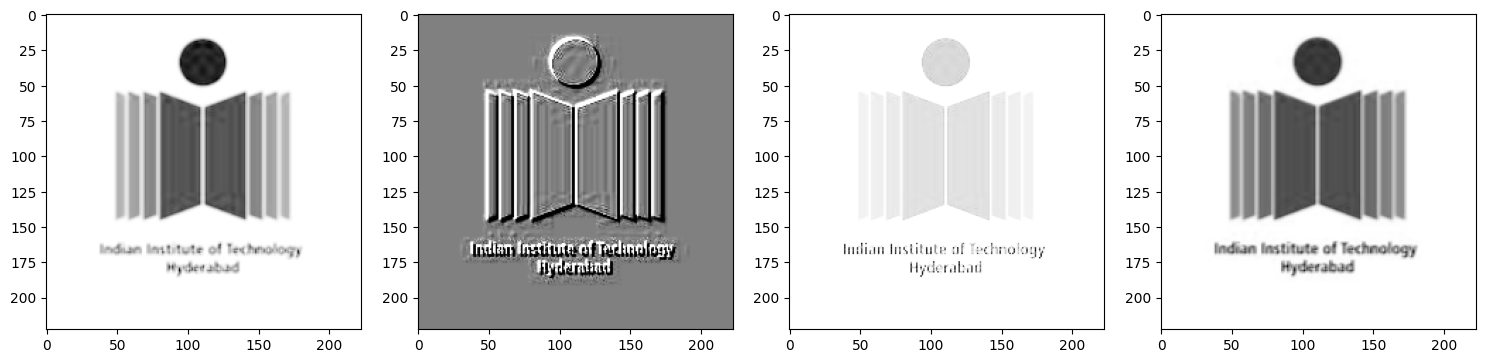

In [13]:
print(f"Verifying that the output of this function does indeed have the expected size (W × H × C) \n volume:{output.shape} for 4 kernels")

c = output.shape[-1]
fig, ax = plt.subplots(1,c, figsize = (15,12))
fig.tight_layout(pad=1.0)

for i in range(c):
    ax[i].imshow(output[:,:,i],cmap='gray')
plt.show()

#### 4) Pooling layer function

In [ ]:
def pooling_layer_func( img , pooling_func , stride ):
    width, height, channel = img.shape
    output = np.zeros(((width-2)//stride+1, (height-2)//stride +1, channel))
    for i in range(channel):
        output[:,:,i] = pooling(img[:,:,i], pooling_func, stride)
    return output

output = pooling_layer_func(output, 'max_pool', 4)

#### 5) Flattening (unraveling) function

In [15]:
def flattening(image , weight_matrix ):
    image_flatten = image.flatten()
    return weight_matrix @ image_flatten

#### 6) Multilayer Perceptron (MLP) function

In [16]:
# defining softmax activation function

softmax = lambda x: np.exp(x)/np.sum(np.exp(x))

In [17]:
def mlp(input_layer , n_hidden , size_hidden, activation , output_size ):
    for i in range(n_hidden):
        hidden_weights = np.random.random(( size_hidden[i], input_layer.shape[0]))/40
        input_layer = activation(hidden_weights @ input_layer)

    # for output
    output_layer_weights = np.random.random((output_size, input_layer.shape[0]))/40

    # output layer with softmax activation
    output_layer_with_softmax = softmax(output_layer_weights @ input_layer)

    # output layer with out softmax activation
    output_layer_without_softmax = output_layer_weights @ input_layer

    return output_layer_with_softmax, output_layer_without_softmax

### Loading cifar-10-dataset

In [18]:
def load(dataset):
    import pickle
    with open(dataset, 'rb') as f:
        dictionary = pickle.load(f, encoding='bytes')
    return dictionary

dict = load('cifar-10-batches-py/data_batch_2')
labels = dict[b'labels']
data = dict[b'data']
images = [None]*10
for i in range(10):
    image = data[labels.index(i)].reshape(3,32,32).transpose(1,2,0)
    images[i] = image

#### 7) Feed-forward path

In [19]:
def feed_forward_path(img , ret_flatten = False):
    kernels = []
    for _ in range(16):
        kernels.append(np.random.random((3,3,3))/800) 
    kernels = tuple(kernels)
    output_img = conv_layer_func(img, kernels)
    pooled_output_img = pooling_layer_func(output_img, 'max_pool', stride = 4)

    kernels = []
    for _ in range(8):
        kernels.append(np.random.random((3,3,16))/1000) 
    kernels = tuple(kernels)
    conv_again_img = conv_layer_func(pooled_output_img, kernels )
    pooled_again_output_img = pooling_layer_func(conv_again_img, 'max_pool', stride = 4)

    weight_matrix = None 
    s = pooled_again_output_img.flatten().shape[0]
    weight_matrix = np.random.random((s//4,s))/100
    flattened_output = flattening(pooled_again_output_img, weight_matrix)
    if ret_flatten:
        return flattened_output
    size_of_hidden = 20
    output = mlp(flattened_output, 1, (size_of_hidden,), 10)
    return output